In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



---

## Section 1: Pandas (Data Manipulation)

**1. Load the dataset `ecommerce_sales.csv` into a Pandas DataFrame.**

In [24]:
df = pd.read_csv('ecommerce_sales.csv')

**2. Display the first 5 rows and the last 5 rows of the dataset.**

In [25]:
df.head(5)

,Order_ID,Date,Category,Product,Price,Quantity,Payment_Method,City
0,1001,2023-05-06,Home,Chair,41.76,3,PayPal,Houston
1,1002,2023-01-16,Home,Chair,307.53,1,PayPal,Los Angeles
2,1003,2023-08-03,Home,Desk,366.53,5,Cash,Houston
3,1004,2023-05-23,Electronics,Headphones,1062.30,3,PayPal,Chicago
4,1005,2023-11-06,Electronics,Keyboard,190.24,3,Credit Card,Phoenix


**3. Check for missing values in the dataset and report the count for each column.**

In [26]:
df.isnull().sum()

Order_ID           0
Date               0
Category           0
Product            0
Price             24
Quantity           0
Payment_Method     0
City              21
dtype: int64

**4. Drop any rows that have missing values.**

In [27]:
df.dropna()

,Order_ID,Date,Category,Product,Price,Quantity,Payment_Method,City
0,1001,2023-05-06,Home,Chair,41.76,3,PayPal,Houston
1,1002,2023-01-16,Home,Chair,307.53,1,PayPal,Los Angeles
2,1003,2023-08-03,Home,Desk,366.53,5,Cash,Houston
3,1004,2023-05-23,Electronics,Headphones,1062.30,3,PayPal,Chicago
4,1005,2023-11-06,Electronics,Keyboard,190.24,3,Credit Card,Phoenix
...,...,...,...,...,...,...,...,...
495,1496,2023-08-30,Clothing,T-Shirt,58.99,5,PayPal,San Diego
496,1497,2023-11-16,Electronics,Monitor,1239.66,2,PayPal,Phoenix
497,1498,2023-07-13,Clothing,Hat,126.31,2,PayPal,San Antonio
498,1499,2023-02-19,Home,Bookshelf,418.46,5,Cash,Chicago


**5. Convert the 'Date' column to a datetime object.**

**6. Create a new column `Total_Sales` which is `Price` * `Quantity`.**

In [28]:
df['Total_Sales'] = df['Quantity'] * df['Price']
print(df['Total_Sales'])

0       125.28
1       307.53
2      1832.65
3      3186.90
4       570.72
        ...   
495     294.95
496    2479.32
497     252.62
498    2092.30
499     383.62
Name: Total_Sales, Length: 500, dtype: float64


**7. Calculate the total revenue (sum of `Total_Sales`) for the entire dataset.**

In [29]:
total_sales = df['Total_Sales'].sum()
print("Total Sales:",total_sales)

Total Sales: 606520.56


**8. Find the average price of products sold.**

In [30]:
average_product_sold  = df.groupby('Product')['Total_Sales'].mean()
print(average_product_sold)

Product
Bookshelf      655.690645
Chair          586.458485
Desk           732.968684
Hat            292.676786
Headphones    2575.684062
Jacket         367.622258
Jeans          373.104815
Keyboard      2689.696552
Lamp           982.931613
Laptop        3037.818966
Monitor       2531.823103
Mouse         2883.192308
Rug            731.121429
Sneakers       262.192759
T-Shirt        322.063143
Name: Total_Sales, dtype: float64


**9. What is the total quantity sold for each Category?**

In [31]:
total_quantity_sold = df.groupby('Category')['Quantity'].sum()

print(total_quantity_sold)

Category
Clothing       472
Electronics    519
Home           500
Name: Quantity, dtype: int64


**10. Which City has the highest total sales?**

In [32]:
city_with_highest_sales = df.groupby('City')['Total_Sales'].sum()
print(city_with_highest_sales)

City
Chicago         69234.46
Houston         69510.29
Los Angeles     67416.28
New York        76418.53
Philadelphia    84014.38
Phoenix         67930.49
San Antonio     51036.36
San Diego       90074.03
Name: Total_Sales, dtype: float64


**11. Count the number of unique products in the dataset.**

In [33]:
count_unique_product = df['Product'].nunique()
print(count_unique_product)

15


**12. Filter the data to show only sales for 'Electronics'.**

In [34]:
eletronics = df[df['Category'] == 'Electronics']

print(eletronics.head())

    Order_ID        Date     Category     Product    Price  Quantity  \
3       1004  2023-05-23  Electronics  Headphones  1062.30         3   
4       1005  2023-11-06  Electronics    Keyboard   190.24         3   
11      1012  2023-01-25  Electronics  Headphones   788.81         1   
13      1014  2023-05-17  Electronics      Laptop  1038.48         5   
14      1015  2023-09-17  Electronics       Mouse  1459.24         2   

   Payment_Method          City  Total_Sales  
3          PayPal       Chicago      3186.90  
4     Credit Card       Phoenix       570.72  
11         PayPal   Los Angeles       788.81  
13    Credit Card  Philadelphia      5192.40  
14     Debit Card   Los Angeles      2918.48  


**13. Find the top 5 most expensive products sold (based on Price).**

In [35]:
most_expensive_product = df.loc[df['Price'].idxmax()]

print(most_expensive_product)

Order_ID                 1230
Date               2023-09-11
Category          Electronics
Product                Laptop
Price                  1495.9
Quantity                    4
Payment_Method     Debit Card
City                      NaN
Total_Sales            5983.6
Name: 229, dtype: object


**14. Calculate the total sales per Payment Method.**

In [36]:
total_sale_per_method = df.groupby('Payment_Method')['Total_Sales'].sum()

print(total_sale_per_method)

Payment_Method
Cash           140162.46
Credit Card    135428.19
Debit Card     159405.60
PayPal         171524.31
Name: Total_Sales, dtype: float64


**15. Create a new column `Month` extracted from the `Date` column.**

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month_name()

print(df['Month'].value_counts())

Month
December     53
January      49
May          48
September    46
March        42
June         42
November     40
August       40
April        39
July         34
October      34
February     33
Name: count, dtype: int64


**16. What is the total sales for each month?**

In [38]:
total_sale_per_month = df.groupby('Month')['Total_Sales'].sum()

print(total_sale_per_month)


Month
April        36537.82
August       59722.49
December     76143.90
February     38098.00
January      51900.46
July         47775.45
June         43003.36
March        54719.71
May          69107.47
November     44780.01
October      34483.16
September    50248.73
Name: Total_Sales, dtype: float64


---

## Section 2: Numpy (Numerical Operations)

**17. Convert the `Price` column to a NumPy array and calculate the mean and median.**

In [39]:
price_array = df['Price'].to_numpy()

print(price_array)

mean_price = np.mean(price_array)
median_price = np.median(price_array)

print(mean_price)
print(median_price)

[  41.76  307.53  366.53 1062.3   190.24     nan  173.96   57.71   68.59
   68.19   97.15  788.81   31.43 1038.48 1459.24  592.18   63.1    90.34
 1145.13     nan   33.38 1020.02   36.98   58.49   70.14 1393.23  599.51
  102.75  266.34  635.47  469.31  244.9   187.99  317.49 1126.5   267.54
  134.68  286.43  354.61     nan  164.4    55.92   70.15   40.76  235.11
 1392.08   76.5   120.16   57.83  403.06  167.32 1476.71  262.36  248.34
  309.86   66.65  390.02  143.13     nan  116.88  537.39  121.59   78.92
  170.28  384.49 1424.25  395.56  189.46  408.6    35.95   98.39  181.48
  188.11  178.46  156.47 1053.09  185.47  153.72  163.01   89.49  882.39
  167.98  198.91  174.83 1007.62  250.86  464.24 1248.62   42.38  107.8
  476.87  199.45  174.39  243.77  339.1   156.8  1461.06 1488.77  225.28
  380.76   70.91  157.32  174.08  109.16   37.21  144.69   26.46  693.33
   46.2   142.96  181.8   330.3    39.2   159.01 1212.8   325.28  523.74
  110.32  104.3   162.32     nan  460.17   45.16  70

**18. Create a NumPy array of `Quantity` and find the standard deviation.**

In [40]:
array_quantity = df['Quantity']

quantity_array_deviation = array_quantity.std()

print(quantity_array_deviation)

1.3890770569483468


**19. Find the maximum and minimum price using NumPy functions.**

In [41]:
print(df['Price'].dtype)

float64


In [42]:
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

In [43]:
price_array = df['Price'].dropna().to_numpy()

print(price_array)

[  41.76  307.53  366.53 1062.3   190.24  173.96   57.71   68.59   68.19
   97.15  788.81   31.43 1038.48 1459.24  592.18   63.1    90.34 1145.13
   33.38 1020.02   36.98   58.49   70.14 1393.23  599.51  102.75  266.34
  635.47  469.31  244.9   187.99  317.49 1126.5   267.54  134.68  286.43
  354.61  164.4    55.92   70.15   40.76  235.11 1392.08   76.5   120.16
   57.83  403.06  167.32 1476.71  262.36  248.34  309.86   66.65  390.02
  143.13  116.88  537.39  121.59   78.92  170.28  384.49 1424.25  395.56
  189.46  408.6    35.95   98.39  181.48  188.11  178.46  156.47 1053.09
  185.47  153.72  163.01   89.49  882.39  167.98  198.91  174.83 1007.62
  250.86  464.24 1248.62   42.38  107.8   476.87  199.45  174.39  243.77
  339.1   156.8  1461.06 1488.77  225.28  380.76   70.91  157.32  174.08
  109.16   37.21  144.69   26.46  693.33   46.2   142.96  181.8   330.3
   39.2   159.01 1212.8   325.28  523.74  110.32  104.3   162.32  460.17
   45.16  707.78  471.35  196.57  182.93  347.55  16

In [44]:



min_price = np.min(price_array)
max_price = np.max(price_array)


print('Minimum Price',min_price)
print('Maximum Price',max_price)

Minimum Price 24.17
Maximum Price 1495.9


**20. Create a generic NumPy array `[1, 2, 3, 4, 5]` and multiply it by 10.**

In [45]:
generic_numpy = np.array([1,2,3,4,5])

for i in generic_numpy:
    print(i * 10)

10
20
30
40
50


**21. Filter the `Price` array to get all prices greater than 500.**

In [50]:
price_greater_than_500 = df[df['Price'] > 500]

price_greater_than_500[['Product','Price']]

,Product,Price
3,Headphones,1062.30
11,Headphones,788.81
13,Laptop,1038.48
14,Mouse,1459.24
15,Headphones,592.18
...,...,...
477,Headphones,1102.10
485,Monitor,1042.03
488,Laptop,1471.86
492,Headphones,651.19


---

## Section 3: Matplotlib (Data Visualization)

**22. Plot a line chart showing the trend of Total Sales over time (by Date).**

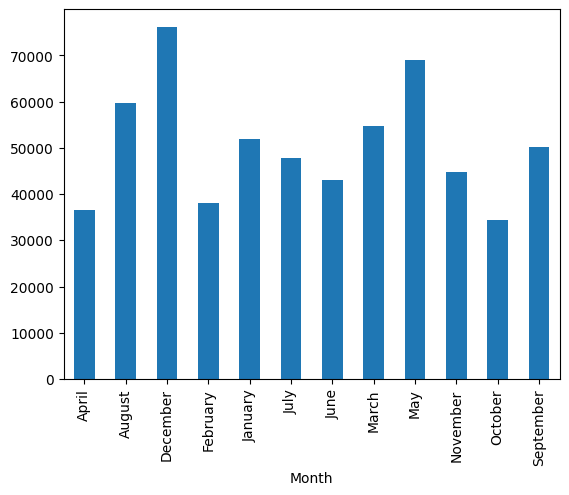

In [57]:
sale_per_date = df.groupby('Month')['Total_Sales'].sum()

sale_per_date.plot(kind='bar')

plt.show()

**23. Create a bar chart comparing the Total Sales by Category.**

Category
Clothing        48540.87
Electronics    434387.21
Home           123592.48
Name: Total_Sales, dtype: float64


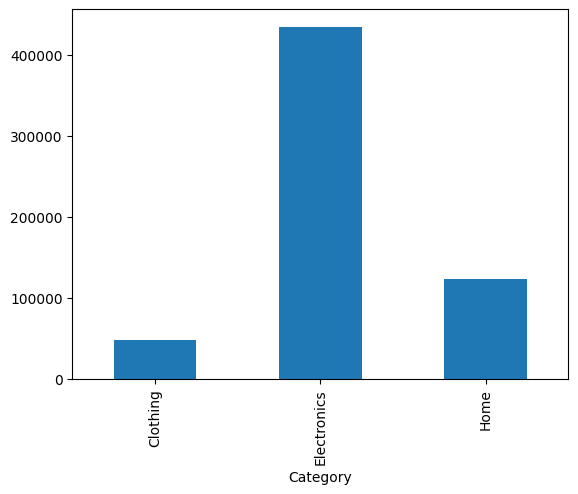

In [61]:
total_sales_per_category  = df.groupby('Category')['Total_Sales'].sum()
print(total_sales_per_category)

total_sales_per_category.plot(kind='bar')
plt.show()

**24. Create a histogram of the `Price` column to see the distribution.**

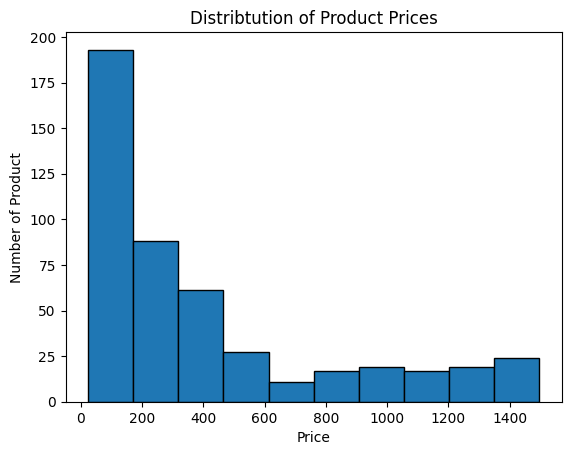

In [62]:
plt.hist(df['Price'].dropna(),bins=10,edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Number of Product')
plt.title('Distribtution of Product Prices')
plt.show()

**25. Create a scatter plot of `Price` vs `Quantity`.**

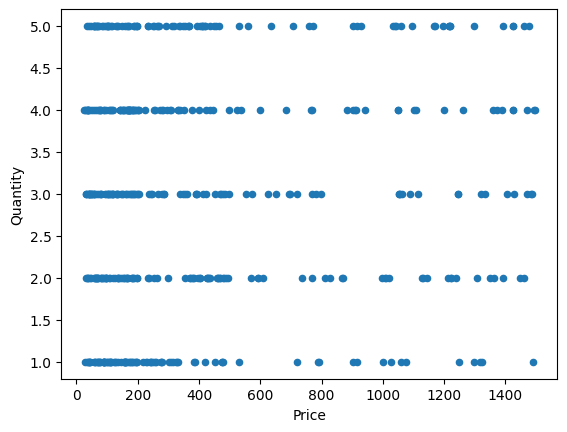

In [65]:
scatter_plot = df[['Price','Quantity']]

scatter_plot.plot(kind='scatter', x='Price', y='Quantity')
plt.show()

**26. Create a pie chart showing the distribution of sales by Payment Method.**

Payment_Method
Cash           129
Credit Card    125
Debit Card     124
PayPal         122
Name: count, dtype: int64


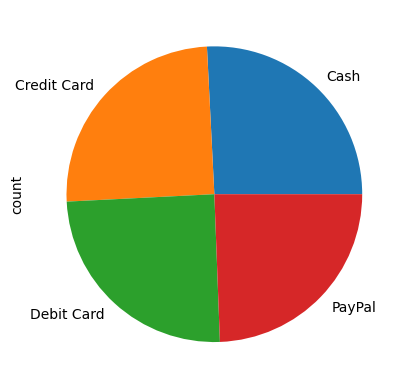

In [67]:
payment_method = df['Payment_Method'].value_counts()
print(payment_method)

payment_method.plot(kind='pie')
plt.show()

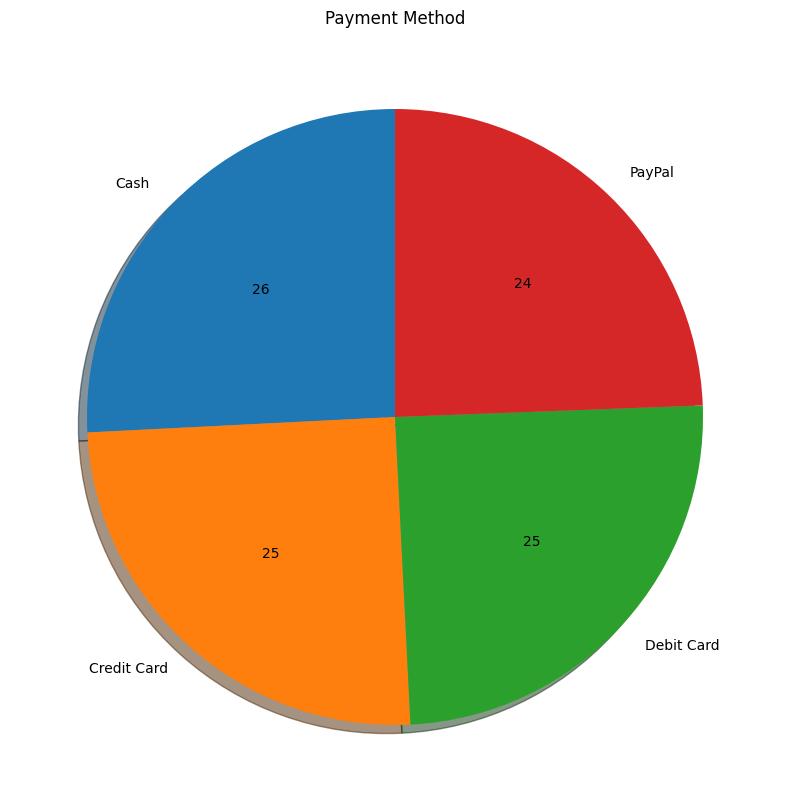

In [68]:
payment_method.plot(
    kind='pie',
    autopct='%1.0f',
    startangle=90,
    figsize=(10,10),
    shadow=True
)

plt.ylabel('')
plt.title('Payment Method')
plt.show()

**27. Create a bar chart showing the count of sales by City.**

In [80]:
sale_per_city = df.groupby('City')['Total_Sales'].sum()

print(sale_per_city)


City
Chicago         69234.46
Houston         69510.29
Los Angeles     67416.28
New York        76418.53
Philadelphia    84014.38
Phoenix         67930.49
San Antonio     51036.36
San Diego       90074.03
Name: Total_Sales, dtype: float64


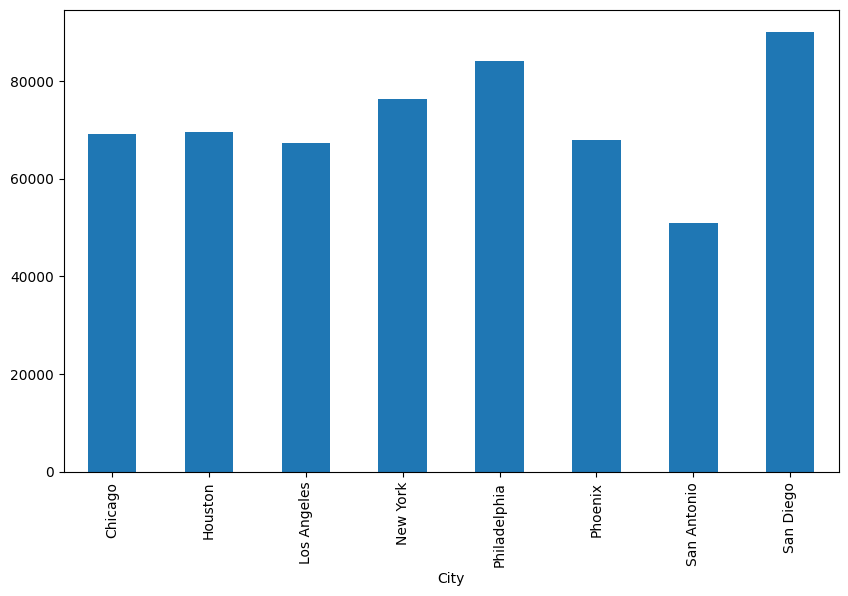

In [83]:

sale_per_city.plot(
    kind='bar',
    x='City',
    y='Sales',
 

    figsize=(10,6)
)

plt.show()

**28. Plot two subplots: one for Sales by Category (Bar) and one for Sales by Month (Line).**

<Axes: xlabel='Category'>

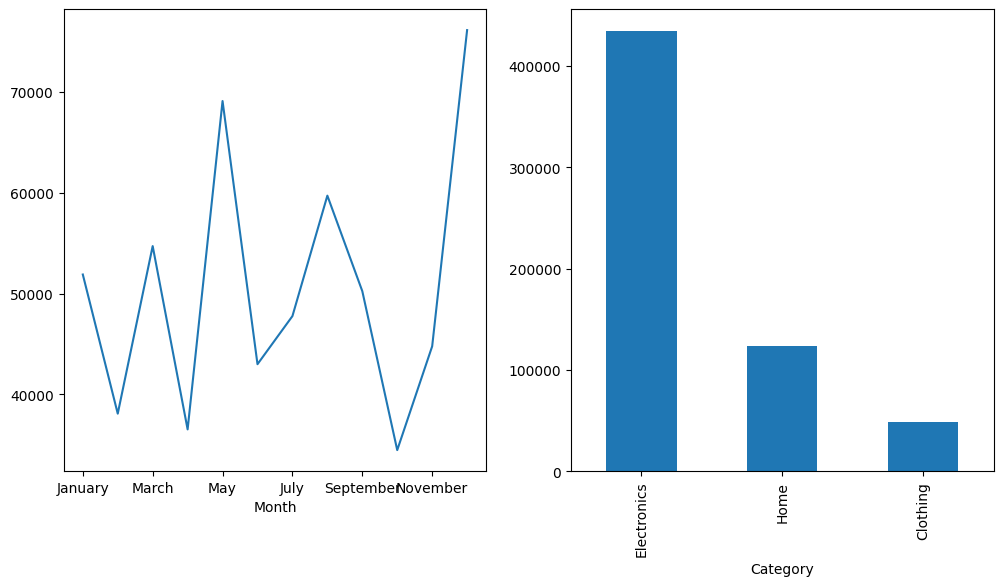

In [88]:
sale_by_category = df.groupby('Category')['Total_Sales'].sum().sort_values(ascending=False)
sales_by_month = df.groupby('Month')['Total_Sales'].sum()

month_order = [
    'January','February',
    'March','April','May','June',
    'July','August','September',
    'October','November','December'
    ]

sales_by_month = sales_by_month.reindex(month_order)

fig,axes = plt.subplots(1,2,figsize=(12,6))

sales_by_month.plot(kind='line',ax=axes[0])
sales_by_category.plot(kind='bar',ax=axes[1])

**29. Create a box plot for `Price` to check for outliers.**

In [91]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

IQR = Q3 - Q1

outliers = df[(df['Price'] < Q1 - 1.5 * IQR) | (df['Price'] > Q3 + 1.5 * IQR)]
print(outliers)

     Order_ID       Date     Category     Product    Price  Quantity  \
14       1015 2023-09-17  Electronics       Mouse  1459.24         2   
18       1019 2024-01-01  Electronics     Monitor  1145.13         2   
25       1026 2023-03-27  Electronics      Laptop  1393.23         2   
34       1035 2023-05-20  Electronics      Laptop  1126.50         2   
45       1046 2023-12-18  Electronics     Monitor  1392.08         5   
51       1052 2023-02-07  Electronics  Headphones  1476.71         5   
65       1066 2023-12-25  Electronics     Monitor  1424.25         4   
87       1088 2023-01-31  Electronics       Mouse  1248.62         1   
96       1097 2023-05-03  Electronics      Laptop  1461.06         5   
97       1098 2023-08-25  Electronics  Headphones  1488.77         1   
114      1115 2023-11-22  Electronics     Monitor  1212.80         2   
142      1143 2023-07-12  Electronics      Laptop  1131.86         2   
164      1165 2023-04-09  Electronics       Mouse  1424.12      

<Axes: title={'center': 'Box Plot of Price'}>

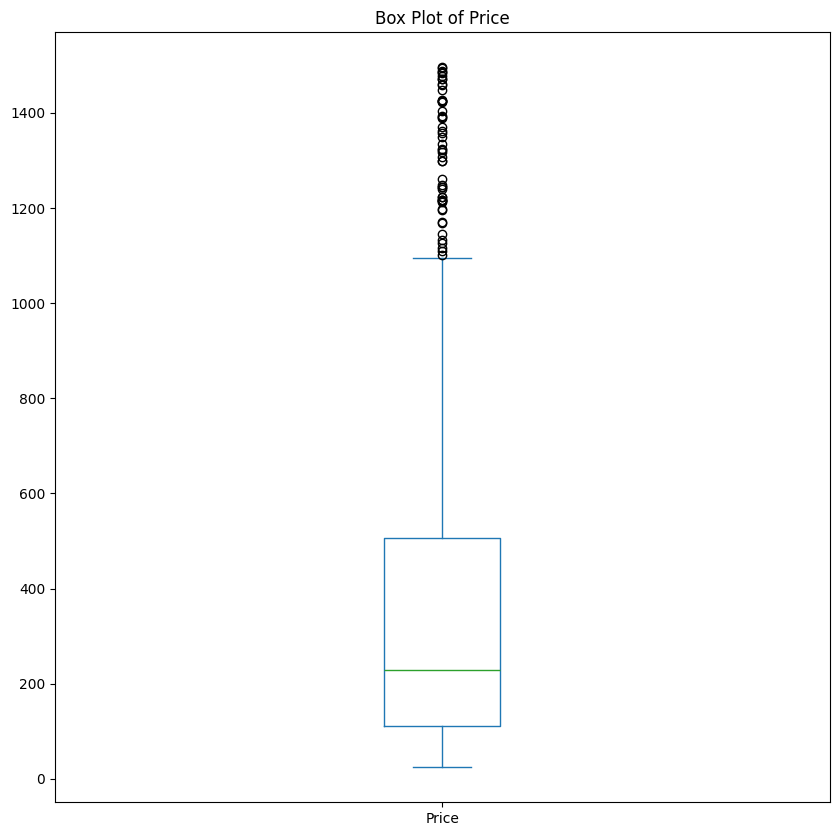

In [92]:
df['Price'].plot(kind='box',figsize=(10,10),title='Box Plot of Price')

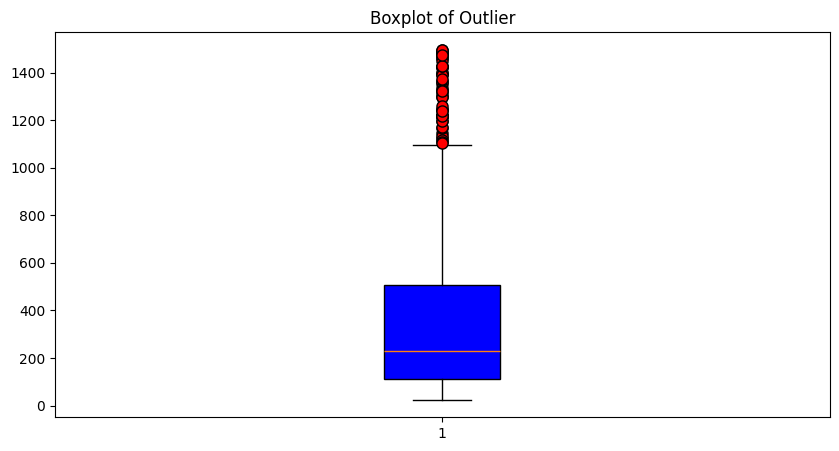

In [95]:
plt.figure(figsize=(10,5))

box = plt.boxplot(
    df['Price'].dropna(),
    patch_artist=True,
    flierprops = dict(marker='o',markerfacecolor='red',markersize=8,linestyle='none'),
    boxprops = dict(facecolor='blue')
)

plt.title('Boxplot of Outlier')
plt.show()

**30. Customize one of your plots with a title, x-label, y-label, and a grid.**